In [11]:
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import image
from keras.models import load_model
from keras import backend as K
from sklearn.neighbors import NearestNeighbors

import numpy as np
import sys
from glob import glob
import scipy.sparse as sp
from scipy import io

import os


from IPython.display import Image


import src.utils.utils as ut
import src.utils.model_utils as mu
import src.utils.sparse_matrix as sm
import src.data.dataframe as dat
import src.features.build_features as bf

In [12]:
df = dat.read_df(os.path.join(ut.dirs.processed_dir,
                                  ut.df_names.cleaned_df))

In [13]:
filenames = df['imagename']
#filenames = [f[3:] for f in filenames]
print(len(filenames))
filenames[0]

9171


'/home/lisa/Schreibtisch/e-commerce/data/processed/train/114632999.jpg'

In [14]:
load_sparse_from = os.path.join(ut.dirs.model_dir, ut.df_names.extracted_features)

vecs = sm.load_sparse_matrix(load_sparse_from)
vecs.shape

(9171, 128)

In [15]:
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(vecs)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [16]:
def similar(vec):
    dist, indices = knn.kneighbors(vec.reshape(1,-1), n_neighbors=6)
    dist, indices = dist.flatten(), indices.flatten()
    return [filenames[indices[i]] for i in range(len(indices))]

In [17]:
import PIL
from matplotlib import pyplot as plt
%matplotlib inline

In [18]:
def draw(fnames, origin=None):
    if origin is not None:
        plt.imshow(PIL.Image.open(origin))
        plt.axis('off')
    plt.figure(figsize=(30,15))
    for i in range(len(fnames)):
        f = fnames[i]
        try:
            img = PIL.Image.open(f)
            plt.subplot(1,10,i+1)
            plt.axis('off')
            plt.imshow(img)
        except Exception as e:
            print(e)

['/home/lisa/Schreibtisch/e-commerce/data/processed/train/102001403.jpg', '/home/lisa/Schreibtisch/e-commerce/data/processed/validate/65937807.jpg', '/home/lisa/Schreibtisch/e-commerce/data/processed/train/109397827.jpg', '/home/lisa/Schreibtisch/e-commerce/data/processed/train/106325883.jpg', '/home/lisa/Schreibtisch/e-commerce/data/processed/test/122361111.jpg', '/home/lisa/Schreibtisch/e-commerce/data/processed/train/113511483.jpg']


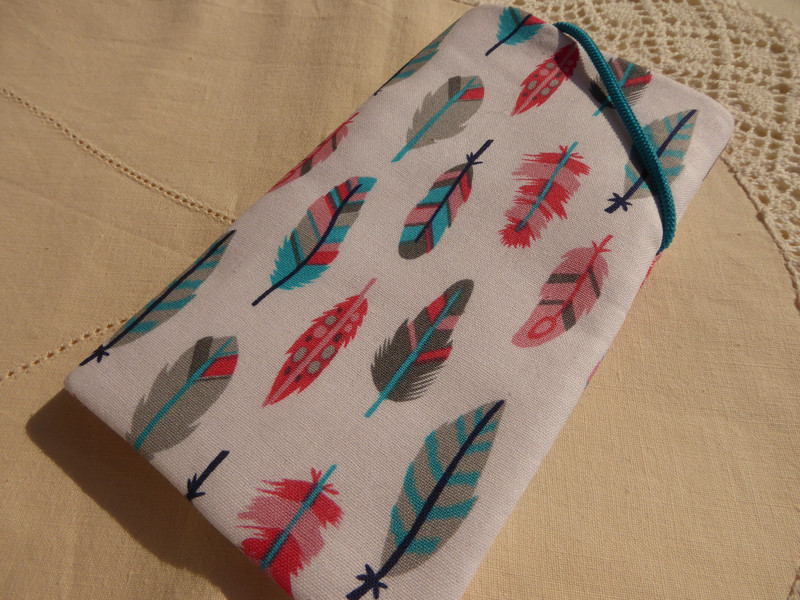

In [25]:
fname = filenames[42]
model = mu.load_pretrained_model('multilabel', 'combined')
v = bf.feature_extract(fname, model)
fnames = similar(v)

print(fnames)
Image(fname)

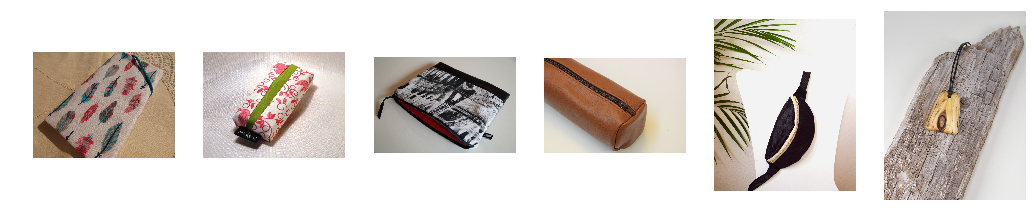

In [26]:
draw(fnames)

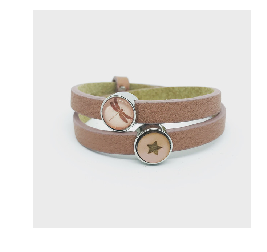

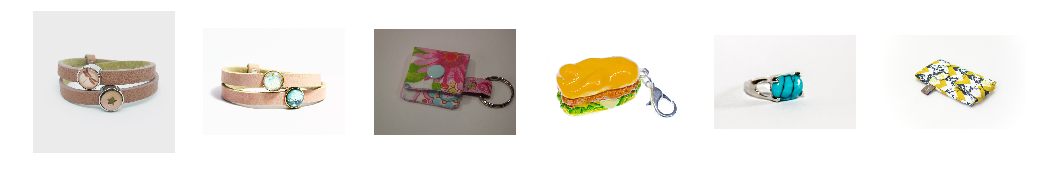

In [22]:
draw(similar(bf.feature_extract(fname, model)), fname)